# Problem Statement:

### To explore classical time series modeling on time series data (4.	https://www.kaggle.com/datasets/robikscube/hourly-energy-consumption)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_comed = pd.read_csv("resources/COMED_hourly.csv")

In [3]:
df_comed.head()

,Datetime,COMED_MW
0,2011-12-31 01:00:00,9970.0
1,2011-12-31 02:00:00,9428.0
2,2011-12-31 03:00:00,9059.0
3,2011-12-31 04:00:00,8817.0
4,2011-12-31 05:00:00,8743.0


In [4]:
df_comed = df_comed.reset_index(drop=True)

In [5]:
df_comed.shape

(66497, 2)

In [6]:
df_comed.dtypes

Datetime     object
COMED_MW    float64
dtype: object

In [7]:
# plt.figure(figsize=(16,9))
# sns.set_style('darkgrid')
# sns.lineplot(data=df_comed, y='COMED_MW', x ='Datetime')
# plt.show()

In [8]:
# plt.figure(figsize=(5,4))
# # plt.scatter(df_comed['Datetime'], df_comed['COMED_MW'], alpha=0.5)
# # plt.show()
# plt.scatter(np.random.rand((3)), np.random.randn((3)))
# plt.show()

In [9]:
# np.ones((3,1))

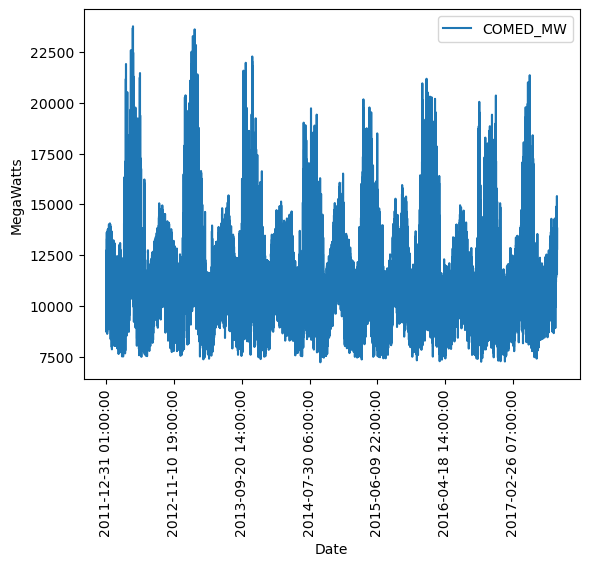

In [10]:
df_comed.plot(x='Datetime', y='COMED_MW')
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('MegaWatts')
plt.show()

In [11]:
df_comed.isnull().sum()

Datetime    0
COMED_MW    0
dtype: int64

### So there are no missing values

Here we wanted to apply SARIMA model (the data seems to have seasonality), for this the SARIMA model expects the data to be stationary.

In [12]:
df_comed.head()

,Datetime,COMED_MW
0,2011-12-31 01:00:00,9970.0
1,2011-12-31 02:00:00,9428.0
2,2011-12-31 03:00:00,9059.0
3,2011-12-31 04:00:00,8817.0
4,2011-12-31 05:00:00,8743.0


In [13]:
df_comed.dtypes

Datetime     object
COMED_MW    float64
dtype: object

In [25]:
# Getting the length and taking the samle of the data to 
# calculate the mean and variance of sample data (This is the first way to check for stationarity)

time_series_len = df_comed.shape[0]
sample_legth = time_series_len // 3
part_1, part_2, part_3 = df_comed['COMED_MW'][0:sample_legth], df_comed['COMED_MW'][(sample_legth):(2*sample_legth)], df_comed['COMED_MW'][(2*sample_legth):(3*sample_legth)]
print("the mean of samples are ", part_1.mean(), part_2.mean(), part_3.mean())
print("the variance of samples are ",part_1.var(), part_2.var(), part_3.var())

the mean of samples are  11690.207759981953 11288.859553349876 11281.239612000902
the variance of samples are  6572132.688425587 4017743.361206887 5228535.912940826


Looks like there is significant difference in the 3 samples variances. 
Thus may be the data is not stationary. Let's check with some more tests.

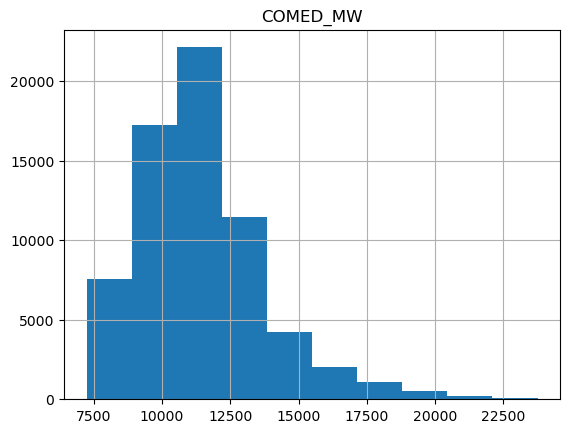

In [29]:
# plotting histogram. This just checks the distribution of the consumption of electricity in MegaWatts. This is not any type of 
# statistical test

df_comed.hist()
plt.show()

Now let's look to plot the difference of the time series (i.e. q = 1)

In [31]:
df_comed.iloc[0]['COMED_MW']

9970.0

In [32]:
df_comed.shape

(66497, 2)

In [36]:
diff = []
for i in range(1, df_comed.shape[0]):
    diff.append((df_comed.iloc[i]['COMED_MW']) - (df_comed.iloc[i-1]['COMED_MW']))

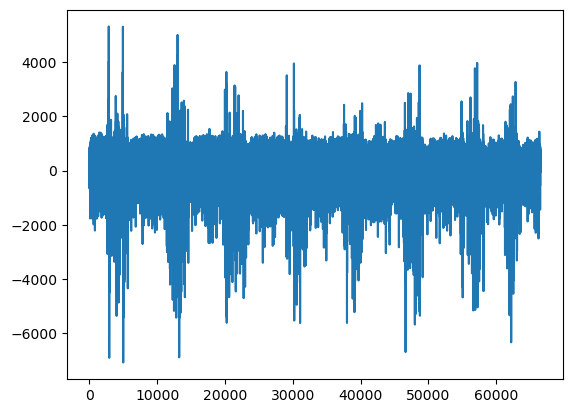

In [37]:
plt.plot(diff)
plt.show()

Looks like the seasonality might by removed with doing one difference. Anyway before doing this let's check for other things.
Now I would like to apply Auto Correlation Function and Augmented Dickey-Fuller test